In [265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras import losses
import numpy as np
import cv2
import os
import glob

In [1]:
import keras

ModuleNotFoundError: No module named 'keras'

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [266]:
model = Sequential()

In [267]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(100, 100, 3)))

In [268]:
model.add(BatchNormalization())

In [269]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu'))

In [270]:
model.add(MaxPooling2D((2,2)))

In [271]:
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))

In [272]:
model.add(BatchNormalization())

In [273]:
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))

In [274]:
model.add(MaxPooling2D((2,2)))

In [275]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu'))

In [276]:
model.add(BatchNormalization())

In [277]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu'))

In [278]:
model.add(MaxPooling2D((3,3)))

In [279]:
model.add(Dropout(0.2))

In [280]:
model.add(Flatten())

In [281]:
model.add(Dense(128, activation='relu'))

In [282]:
model.add(Dense(2, activation='softmax'))

In [283]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [284]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 44, 44, 64)        36928     
__________

In [18]:
model.layers[0]

In [26]:
import os

In [67]:
img_dir = "train/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

x_train, y_train = [], []

for f in files:
    x_train.append(cv2.cvtColor(cv2.resize(cv2.imread(f), (100, 100)), cv2.COLOR_BGR2RGB))
    if(f.split('.')[0][-3:] == 'cat'):
        y_train.append(0)
    else:
        y_train.append(1)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
x_train = x_train / 255

In [68]:
np.save('train_in', x_train)
np.save('train_out', y_train)

In [39]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [30]:
x_train.shape

(25000, 500, 500, 3)

In [32]:
y_train.shape

(25000,)

In [33]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [34]:
y_train.shape

(25000, 2)

In [ ]:
x_train = np.load('input_dat.npy')
y_train = np.load('output_dat.npy')

In [94]:
x_train.shape

(25000, 100, 100, 3)

In [95]:
y_train.shape

(25000, 2)

In [99]:
x_train_split.shape

(15000, 100, 100, 3)

In [101]:
idx = np.random.permutation(len(x_train))


In [102]:
x_train_shuffle, y_train_shuffle = x_train[idx], y_train[idx]

In [103]:
x_train_split, x_validate = np.split(x_train_shuffle, [-10000], axis=0)
y_train_split, y_validate = np.split(y_train_shuffle, [-10000], axis=0)

In [288]:
model.fit(x_train_split, y_train_split, batch_size=32, epochs=2, validation_data=(x_validate,y_validate))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 18s 1ms/step - loss: 0.1573 - acc: 0.9373 - val_loss: 0.3381 - val_acc: 0.8662
Epoch 2/2
15000/15000 [==============================] - 18s 1ms/step - loss: 0.1448 - acc: 0.9431 - val_loss: 0.2333 - val_acc: 0.9036


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 605398312008092421
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6674410373
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4073493882667585365
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [145]:
b = []

In [146]:
for dat in x_train:
    b.append(tf.image.resize_image_with_crop_or_pad(dat, 500, 500))

In [29]:
b[0]

NameError: name 'b' is not defined

In [152]:
x_train = b

In [2]:
2+2

4

In [21]:
x_train[0]

array([[[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [121, 200, 239]],

       ...,

       [[ 55, 122, 153],
        [ 55, 122, 153],
        [ 55, 122, 153],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 54, 121, 152],
        [ 54, 121, 152],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 53, 120, 151],
        [ 53, 120, 151],
        [ 53, 120, 151],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]]

In [28]:
testing = []
for dat in x_train:
    testing.append(tf.image.resize_image_with_crop_or_pad(dat, 500, 500))

In [ ]:
finalList = []
for entry in testing:
    finalList.append(tf.Session().run(entry))


In [ ]:
print(x_train[0].eval())

In [1]:
testing[0]

NameError: name 'testing' is not defined

In [271]:
np.save('input_dat', x_train)

In [272]:
np.save('output_dat', y_train)

In [60]:
x_train[20000].shape

(100, 100, 3)

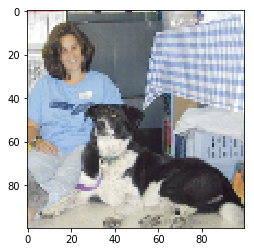

In [138]:

plt.imshow(x_train_split[11006])

In [139]:
if(np.argmax(model.predict(x_train_split[11006].reshape(1, 100, 100, 3))) == 0):
   print("THE IMAGE IS A CAT")
else:
   print("THE IMAGE IS A DOG")

THE IMAGE IS A DOG


In [289]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [290]:
img_dir1 = "test1/test1" # Enter Directory of all images 
data_path1 = os.path.join(img_dir1,'*g')
files1 = glob.glob(data_path1)

x_test = []

for f in files1:
    x_test.append(cv2.cvtColor(cv2.resize(cv2.imread(f), (100, 100)), cv2.COLOR_BGR2RGB))

x_test = np.array(x_test)


KeyboardInterrupt: 

In [292]:
x_test = x_test/250

In [294]:
results = model.predict(x_test)

In [457]:
sonali = cv2.cvtColor(cv2.resize(cv2.imread('cat4.jpg'), (100, 100)), cv2.COLOR_BGR2RGB) / 255

THE IMAGE IS A CAT


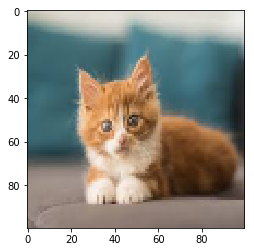

In [458]:
plt.imshow(sonali)
if(np.argmax(model.predict(sonali.reshape(1, 100, 100, 3))) == 0):
   print("THE IMAGE IS A CAT")
else:
   print("THE IMAGE IS A DOG")

In [459]:
model.predict(sonali.reshape(1, 100, 100, 3))

array([[9.9996364e-01, 3.6343052e-05]], dtype=float32)

In [392]:
sonali = sonali / 255

In [393]:
sonali

array([[[0.7254902 , 0.79215686, 0.85490196],
        [0.72156863, 0.78823529, 0.85098039],
        [0.7254902 , 0.78823529, 0.85098039],
        ...,
        [0.31372549, 0.3254902 , 0.29803922],
        [0.48235294, 0.47843137, 0.47058824],
        [0.56862745, 0.59607843, 0.61960784]],

       [[0.74117647, 0.79607843, 0.84705882],
        [0.7372549 , 0.79215686, 0.84313725],
        [0.73333333, 0.79607843, 0.84705882],
        ...,
        [0.31372549, 0.32941176, 0.2745098 ],
        [0.52156863, 0.51764706, 0.49803922],
        [0.60392157, 0.61960784, 0.61568627]],

       [[0.74117647, 0.79215686, 0.82745098],
        [0.75294118, 0.80392157, 0.83921569],
        [0.74901961, 0.8       , 0.83921569],
        ...,
        [0.36862745, 0.36078431, 0.27058824],
        [0.43921569, 0.45490196, 0.34509804],
        [0.63529412, 0.64313725, 0.6       ]],

       ...,

       [[0.59215686, 0.50588235, 0.43529412],
        [0.34509804, 0.32156863, 0.36862745],
        [0.24705882, 0